BeeData: Fundamentos de Machine Learning - Regressão <br>
Autor: Leandro Coelho<br>
Data: 12/05/2024<br>


Objetivos:<br>
1. Retomar conceitos de Machine Learning
2. Regressão Linear
3. Arvore de Regressão


# **Seu Primeiro Modelo de Machine Learning**

## **Importação dos Dados de Custos Médicos**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---

## **Análise Exploratória dos Dados**

In [ ]:
#O que temos em cada coluna dos dados
columns = dados.columns
for i in columns:
  print("Coluna: ",i)
  print(dados[i].value_counts(dropna=False), "\n")

Coluna:  age
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64 

Coluna:  sex
sex
male      676
female    662
Name: count, dtype: int64 

Coluna:  bmi
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64 

Coluna:  children
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

Coluna:  smoker
smoker
no     1064
yes     274
Name: count, dtype: int64 

Coluna:  region
region
southeast    364
southwest    325
northwest    325


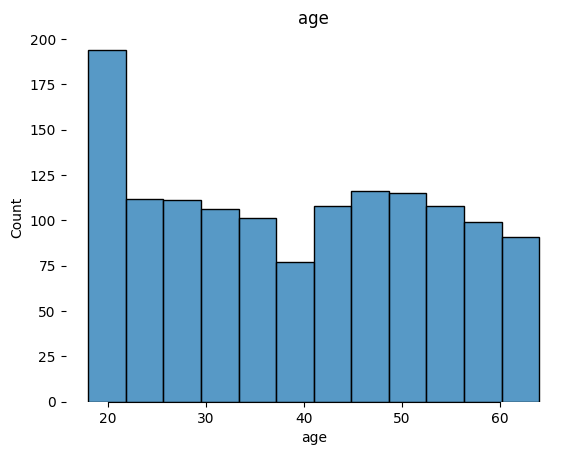

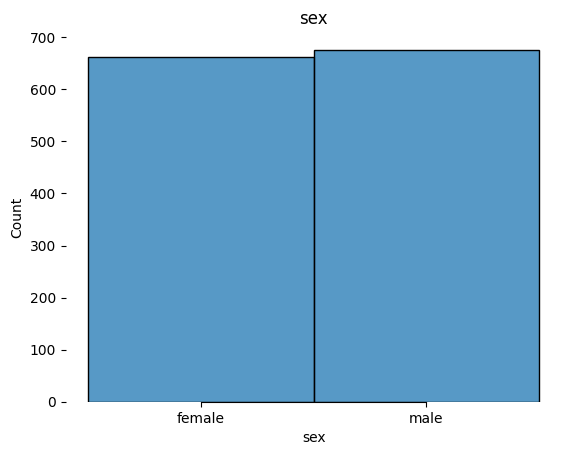

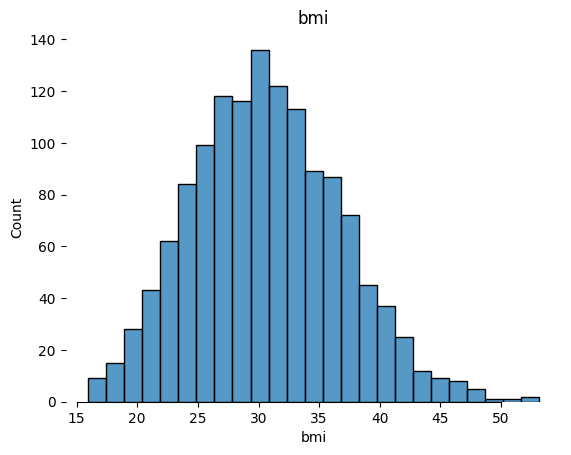

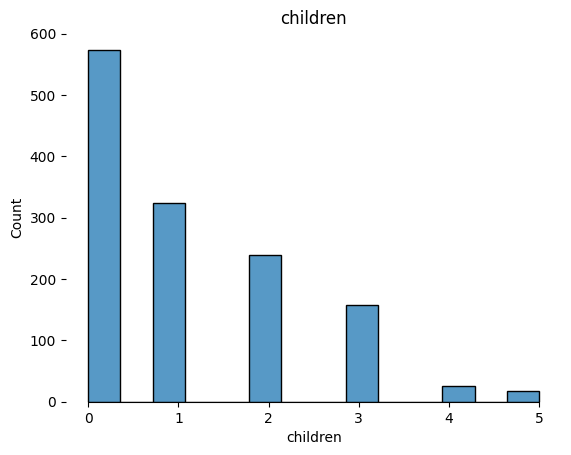

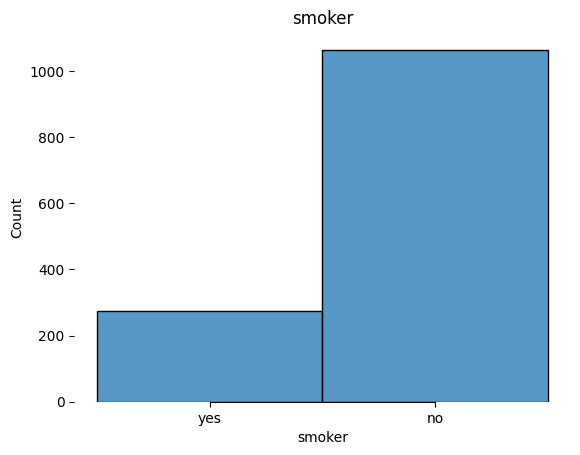

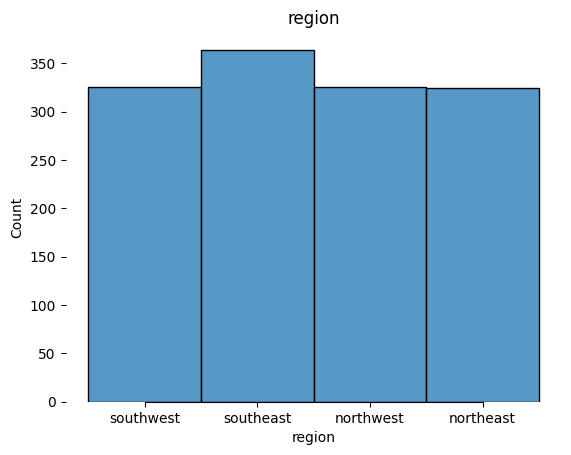

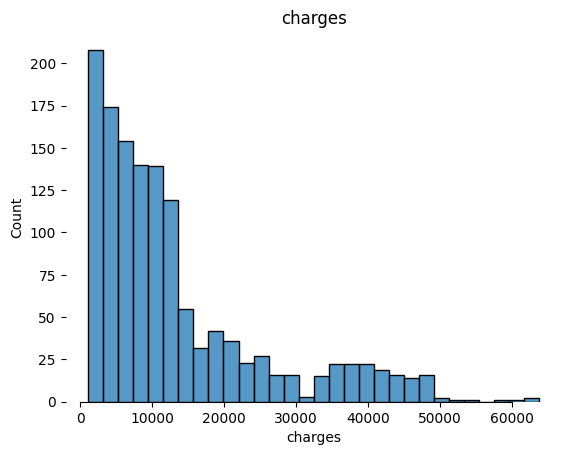

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i, col in enumerate(columns):
  sns.histplot(dados, x=col)
  sns.despine(trim=True, left=True)
  plt.title(col)
  plt.show()

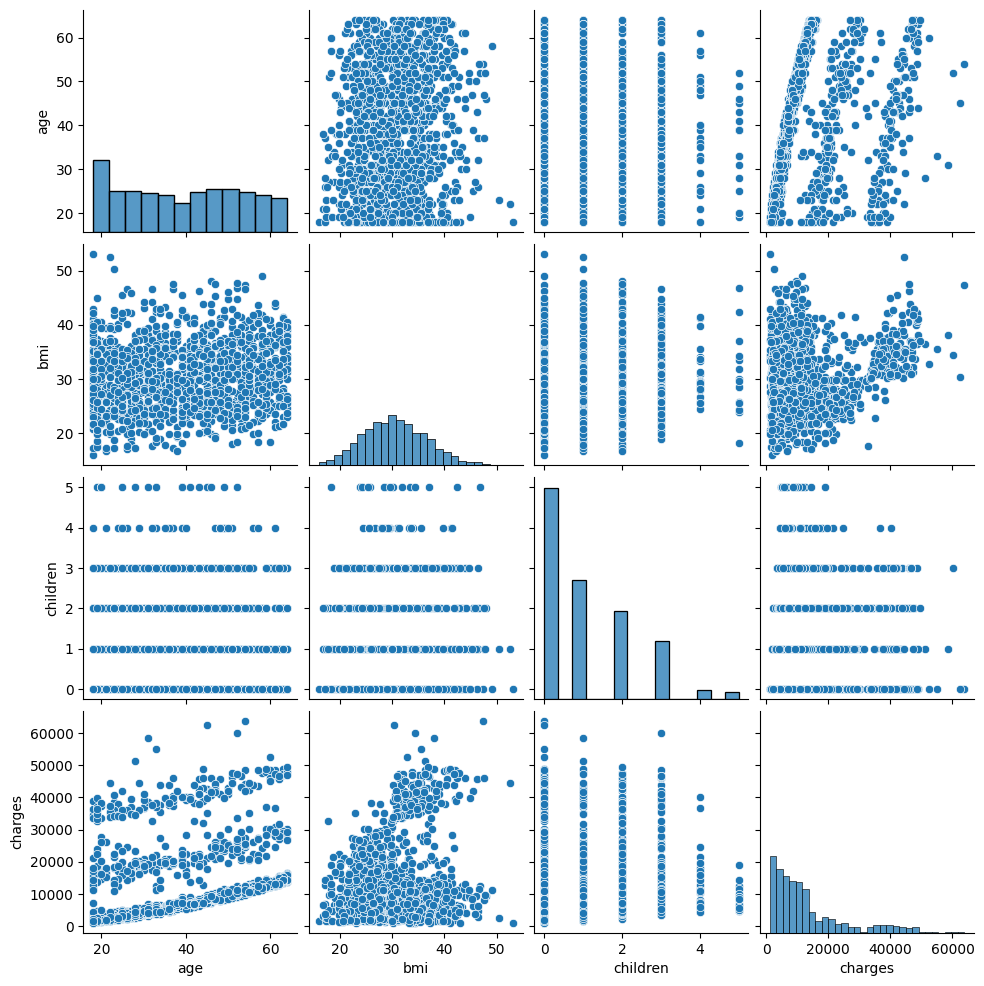

In [ ]:
sns.set_context(font_scale=0.7)
sns.pairplot(dados, # Dados para plotar
             #hue='smoker', #Cada gráfico separado pelo tipo, nossa variável categórica
            )
plt.show()

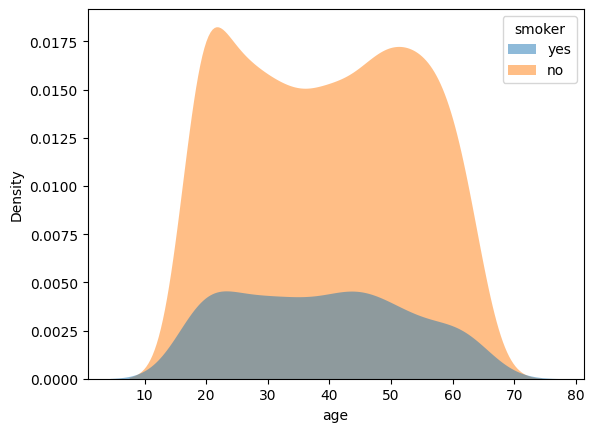

In [ ]:
sns.kdeplot(
   data=dados, x="age", hue="smoker",
   fill=True, common_norm=True,
   alpha=.5, linewidth=0,
)
plt.show()

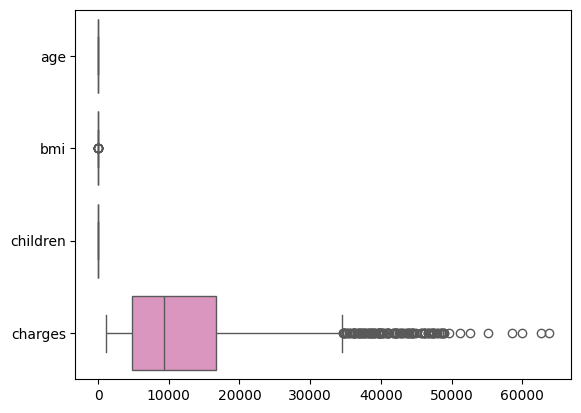

In [ ]:
sns.boxplot(
    data=dados, # Dataframe utilizado
    orient='h', # h -> horizontal, v -> vertical
    palette='Set2'
)
plt.show()

---

## **_Mise en place_ para Modelagem**

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Para tanto, façamos as seguintes transformações:

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

Nessa análise, a princípio, vamos considerar as variáveis: charges, bmi e smoker.

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


Veja essas variáveis no gráfico de dispersão:

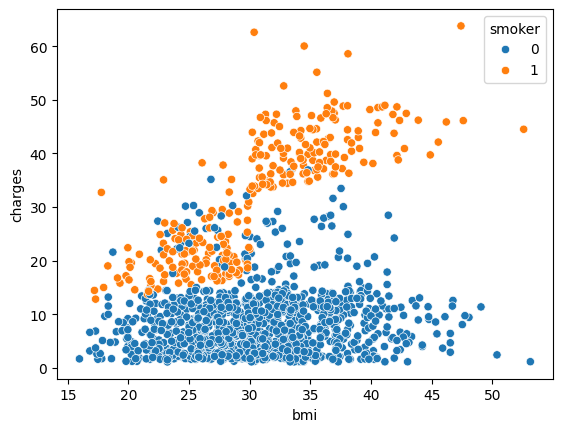

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Nosso Primeiro Modelo de Machine Learning**

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

X = dados[['bmi']]
y = dados['charges']

regressao = LinearRegression()
regressao.fit(X, y) #treinamento do modelo

LinearRegression()

Nesse cenário, o modelo de regressão linear é dado por

$y = \beta_0 + \beta_1 X$

No nosso caso

$Custos = \beta_0 + \beta_1 BMI$

In [ ]:
# Resgatando os coeficientes ajustados

print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


In [ ]:
np.mean(y)

13.270422265141255

In [ ]:
X['bmi'].mean()

30.66339686098655

In [ ]:
X['bmi'].std()

6.098186911679014

In [ ]:
30.66339686098655*b1

11.923018722571005

In [ ]:
# Usando o modelo de regressão linear na prática

novos_dados = pd.DataFrame({'bmi': [15, 20, 28, 33]})
regressao.predict(novos_dados)

array([ 7.10103267,  9.07039782, 12.22138207, 14.19074723])

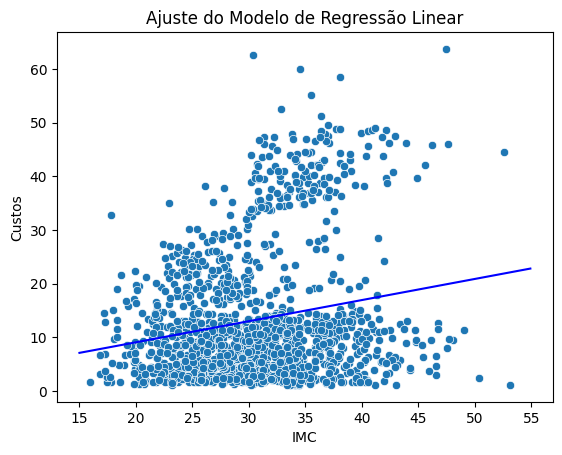

In [ ]:
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

**Pronto, fizemos nosso modelo.**

---

## **Métrica para Avaliação do Modelo**

In [ ]:
# Erro Quadrático Médio

preditos = regressao.predict(X)
eqm = ((y - preditos)**2).mean()
eqm

140.77790009850756

In [ ]:
np.sqrt(140)

11.832159566199232

In [ ]:
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 140.78


---

## **Estratégia de Validação do Modelo**

Validação Cruzada

In [ ]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split

In [ ]:
X

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [ ]:
# Separe os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste)

# Calcule o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.84


In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


**O método Holdout produz resultados com uma certa variabilidade, o que mostra a incerteza sobre a estimativa do EQM do modelo.**

---

## **Alimentação do Modelo com mais Informações**

In [ ]:
# Considerando o modelo com DUAS variáveis preditoras

X = dados[['bmi', 'smoker']]
y = dados['charges']

Nesse cenário, o modelo de regressão linear é dado por

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$

No nosso caso, temos:

**$Custos = \beta_0 + \beta_1 BMI + \beta_2 Smoker$**



In [ ]:
# Repetindo o procedimento de Validação HOLDOUT

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)
preditos = regressao.predict(Xteste)
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 56.54


In [ ]:
# Coeficientes
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -3.4418164317860303
b1 =  0.3888355480191701
b2 =  23.336984479100707


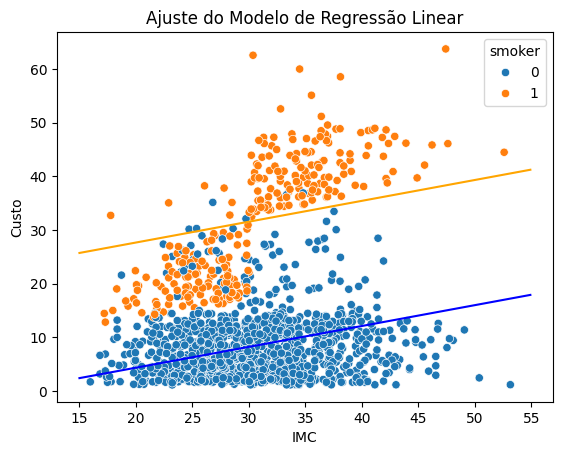

In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

# **O que fazemos quando temos um experimento com variação na resposta?**

---

In [ ]:
# Validação HOLDOUT repetido
resultados = []
repeticoes = 100
for i in range(repeticoes):
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
  regressao = LinearRegression()
  regressao.fit(Xtreino, ytreino)
  preditos = regressao.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  print('EQM : {}'.format(round(eqm, 2)))
  resultados.append(eqm)

EQM : 43.84
EQM : 44.86
EQM : 52.53
EQM : 46.32
EQM : 49.39
EQM : 51.47
EQM : 52.3
EQM : 52.74
EQM : 48.5
EQM : 52.07
EQM : 42.51
EQM : 57.35
EQM : 49.72
EQM : 50.14
EQM : 51.21
EQM : 47.69
EQM : 44.55
EQM : 54.66
EQM : 54.0
EQM : 47.91
EQM : 55.36
EQM : 54.96
EQM : 41.58
EQM : 43.52
EQM : 52.28
EQM : 46.58
EQM : 45.76
EQM : 50.17
EQM : 53.84
EQM : 56.68
EQM : 49.66
EQM : 49.61
EQM : 41.48
EQM : 51.57
EQM : 44.4
EQM : 49.09
EQM : 53.42
EQM : 49.08
EQM : 46.34
EQM : 47.75
EQM : 50.31
EQM : 49.93
EQM : 42.02
EQM : 53.42
EQM : 50.19
EQM : 50.12
EQM : 48.62
EQM : 54.72
EQM : 47.78
EQM : 51.94
EQM : 42.22
EQM : 44.42
EQM : 42.46
EQM : 55.19
EQM : 46.04
EQM : 43.4
EQM : 50.34
EQM : 47.3
EQM : 54.73
EQM : 47.16
EQM : 49.04
EQM : 47.7
EQM : 58.12
EQM : 51.33
EQM : 56.59
EQM : 54.36
EQM : 50.3
EQM : 53.02
EQM : 55.38
EQM : 52.27
EQM : 47.14
EQM : 45.53
EQM : 47.0
EQM : 57.61
EQM : 54.28
EQM : 42.73
EQM : 58.7
EQM : 43.93
EQM : 46.53
EQM : 46.96
EQM : 45.17
EQM : 44.56
EQM : 52.68
EQM : 50.36
EQ

In [ ]:
print(f'Média de {repeticoes} repetições do experimento: {np.mean(resultados)}')

Média de 100 repetições do experimento: 49.5899184720488


In [ ]:
np.sqrt(np.mean(resultados))

7.042010967901768

# **E agora? Chegamos no melhor resultado possível?**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

profundidade = 2

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(repeticoes):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino)

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 138.66
O Erro Quadrático Médio de TESTE  foi:  142.72


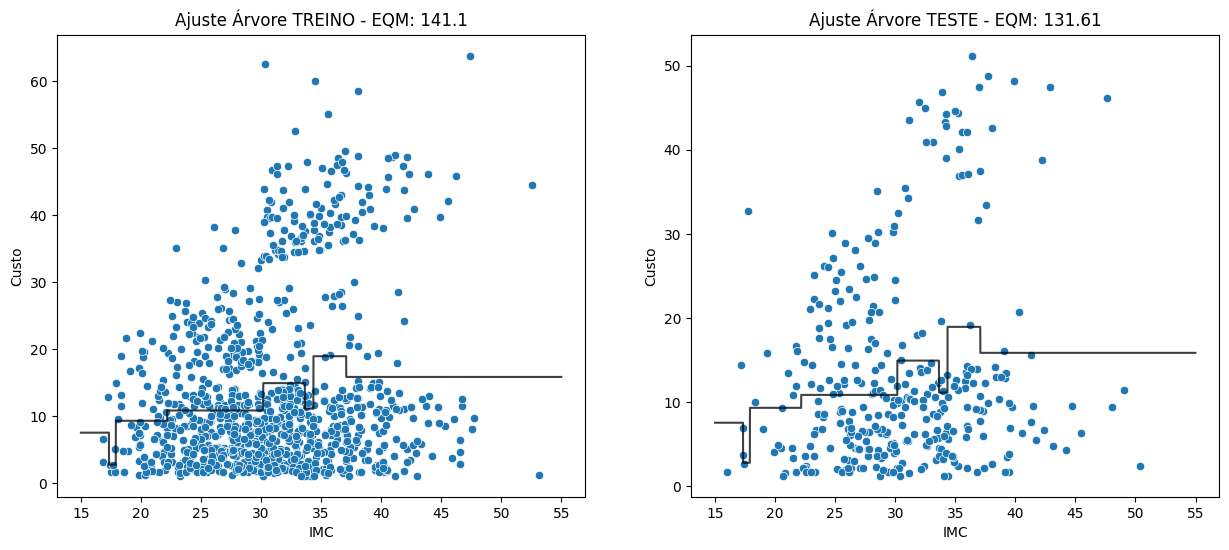

In [ ]:
# Gráfico da Árvore com 1 Variável

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

profundidade = 3
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

#criar linhas do gráfico
x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

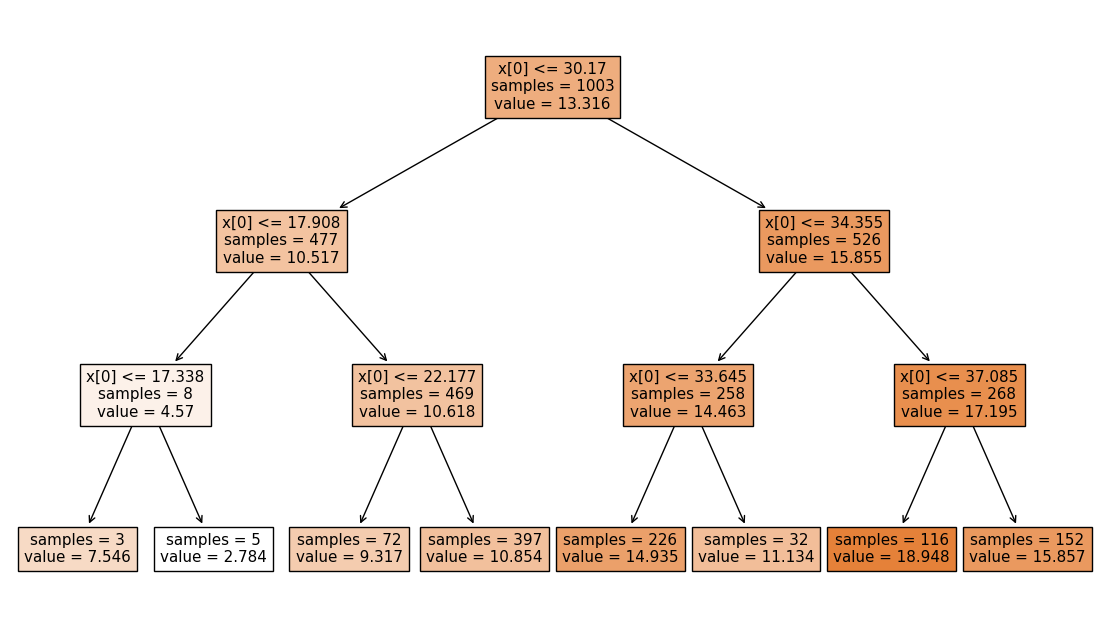

In [ ]:
# Gráfico da Árvore
from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

In [ ]:
# Mas será que esta certo isso?
df_aux = Xtreino.copy()
df_aux['charges'] = ytreino
df_aux[df_aux['bmi']>34.785]['charges'].mean()

17.64197816581967

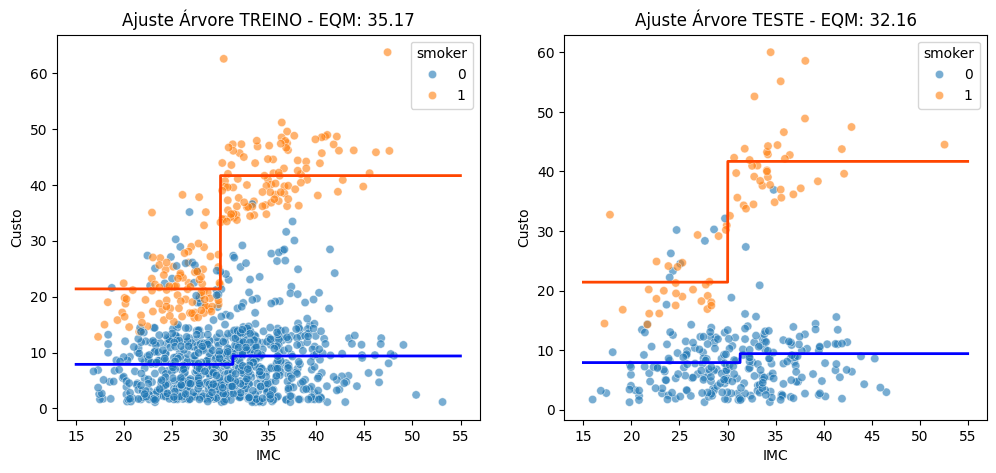

In [ ]:
# Gráfico da Árvore com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

# **Comparação de modelos**

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25):

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)

        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)

    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste

In [ ]:
X = dados[['bmi']]
y = dados['charges']

HoldoutRepetido(DecisionTreeRegressor(max_depth = 2))
HoldoutRepetido(LinearRegression())

EQM médio de TREINO: 138.29
EQM médio de TESTE: 143.77

EQM médio de TREINO: 140.37
EQM médio de TESTE: 142.33



(140.37, 142.33)

In [ ]:
HoldoutRepetido(DecisionTreeRegressor(max_depth = 4))

EQM médio de TREINO: 133.23
EQM médio de TESTE: 150.21



(133.23, 150.21)

In [ ]:
HoldoutRepetido( DecisionTreeRegressor(max_depth = 10) )

EQM médio de TREINO: 100.24
EQM médio de TESTE: 193.08



(100.24, 193.08)

# Fornecendo mais dados e ampliando a busca

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(),
            KNeighborsRegressor(n_neighbors = 5),
            KNeighborsRegressor(n_neighbors = 15),
            KNeighborsRegressor(n_neighbors = 45),
            DecisionTreeRegressor(max_depth = 2),
            DecisionTreeRegressor(max_depth = 5),
            DecisionTreeRegressor(max_depth = 7),
            DecisionTreeRegressor(max_depth = 10),
            RandomForestRegressor(max_depth = 2, n_estimators=50),
            RandomForestRegressor(max_depth = 5, n_estimators=50),
            RandomForestRegressor(max_depth = 7, n_estimators=50),
            RandomForestRegressor(max_depth = 10, n_estimators=50),
           ]

nomes = ['Regressão Linear',
          'KNN - K = 5',
          'KNN - K = 15',
          'KNN - K = 45',
          'Árvore - Prof = 2',
          'Árvore - Prof = 5',
          'Árvore - Prof = 7',
          'Árvore - Prof = 10',
          'Floresta - Prof = 2',
          'Floresta - Prof = 5',
          'Floresta - Prof = 7',
          'Floresta - Prof = 10']

treinos = []
testes = []

for i, modelo in enumerate(modelos):
    print(nomes[i])
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

Regressão Linear
EQM médio de TREINO: 50.04
EQM médio de TESTE: 50.6

KNN - K = 5
EQM médio de TREINO: 31.5
EQM médio de TESTE: 46.91

KNN - K = 15
EQM médio de TREINO: 43.91
EQM médio de TESTE: 51.47

KNN - K = 45
EQM médio de TREINO: 80.54
EQM médio de TESTE: 83.08

Árvore - Prof = 2
EQM médio de TREINO: 34.14
EQM médio de TESTE: 35.29

Árvore - Prof = 5
EQM médio de TREINO: 31.09
EQM médio de TESTE: 36.78

Árvore - Prof = 7
EQM médio de TREINO: 28.08
EQM médio de TESTE: 40.32

Árvore - Prof = 10
EQM médio de TREINO: 22.97
EQM médio de TESTE: 47.33

Floresta - Prof = 2
EQM médio de TREINO: 33.98
EQM médio de TESTE: 34.78

Floresta - Prof = 5
EQM médio de TREINO: 29.87
EQM médio de TESTE: 35.54

Floresta - Prof = 7
EQM médio de TREINO: 26.63
EQM médio de TESTE: 36.75

Floresta - Prof = 10
EQM médio de TREINO: 22.24
EQM médio de TESTE: 39.89



,EQM Treino,EQM Teste
Floresta - Prof = 2,33.98,34.78
Árvore - Prof = 2,34.14,35.29
Floresta - Prof = 5,29.87,35.54
Floresta - Prof = 7,26.63,36.75
Árvore - Prof = 5,31.09,36.78
Floresta - Prof = 10,22.24,39.89
Árvore - Prof = 7,28.08,40.32
KNN - K = 5,31.50,46.91
Árvore - Prof = 10,22.97,47.33
Regressão Linear,50.04,50.60


# Vá além! Plus Ultra!

### Investigue os parâmetros _max_depth_ e _min_samples_split_
### Tente outros modelos de regressão (Dica: pesquise os modelos)
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

svr_default = SVR()

svr_linear = SVR(kernel='linear', C=10)

gbr_default = GradientBoostingRegressor()

gbr_adjusted = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05)

# Notas de rodapé

## Regressão Linear - Regularizações

A fórmula para a regressão linear é:

$$
y = \beta_0 + \beta_1 X
$$

Que quer minimizar o erro:

$$
\text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2
$$

<hr><br>

A função objetivo da regressão linear com regularização L1 (Lasso) é:

$$
\text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

A função objetivo da regressão linear com regularização L2 (Ridge) é:

$$
\text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

A função objetivo da regressão linear com regularização L1 e L2 (Elastic Net) é:

$$
\text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$
